In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=['application_date'], dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaT,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaT,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaT,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,2001-10-10,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [3]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=['date'])
inspections.head()

,business_id,Score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [4]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=['date'])
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [5]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html


# solution is multi set

In [6]:
# It is important to ensure that there no duplicates in the dataframes before merging them

# lets begin with businesses

# we can clearly see there are duplicate values for the same business_id

businesses.business_id.value_counts().head(20)

66698    4
62797    2
81516    2
68390    2
80680    2
5830     2
5301     2
75407    2
84457    2
80829    2
33467    2
3543     2
84527    2
3566     2
9463     2
5496     1
80786    1
2047     1
79220    1
83314    1
Name: business_id, dtype: int64

In [7]:
# lets look at one of them

businesses[businesses.business_id == 66698]

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
4281,66698,Stanley's Steamers,Macys - Geary Entrance,NaN,NaN,0.0,0.0,NaN,H78,392127.0,NaT,SF Carts & Concessions,9 Magee Court,Moraga,CA,94556
4282,66698,Stanley's Steamers,Macys - Geary Entrance,NaN,NaN,0.0,0.0,NaN,H78,NaN,NaT,"SF Carts & Concessions, Inc.",9 Magee Court,Moraga,CA,94556
4283,66698,Stanley's Steamers,Macys - Geary Entrance,NaN,NaN,0.0,0.0,NaN,H78,NaN,NaT,"SF Carts & Concessions, Inc.",9 Magee Court,Moraga,CA,94556
4284,66698,Stanley's Steamers,Macys - Geary Entrance,NaN,NaN,0.0,0.0,NaN,H78,392127.0,NaT,"SF Carts and Concessions, Inc.",9 Magee Court,Moraga,CA,94556


In [8]:
# how many rows are there?

businesses.business_id.size

7544

In [9]:
# how many unique businesses are there?

len(set(businesses.business_id))

7527

In [10]:
# its clear that these are duplicates with minor differences with each other .e.g business_cert value 
# however upon looking at the questions to be answered it is clear that these are columns
# we can ignore.

# we will now remove all duplicate rows from the dataframe

businesses.drop_duplicates(subset=['business_id', 'postal_code'], inplace=True)

len(businesses.business_id)


7527

In [11]:
# Let us to do the same for the other 2 dataframes as well 

inspections.shape

(27285, 4)

In [12]:
inspections.drop_duplicates(inplace=True)

inspections.shape

(27121, 4)

In [13]:
violations.shape

(39720, 5)

In [14]:
violations.drop_duplicates(inplace=True)


violations.shape

(39657, 5)

In [15]:
# lets do some sanity checks before merging
# for every business_id in inspections does a corresponding one exist in businesses?

businesses_ids = set(businesses.business_id)

inspections_ids = set(inspections.business_id)


inspections_ids.difference(businesses_ids)


{1906,
 2043,
 2173,
 2731,
 3265,
 3715,
 4713,
 5799,
 5876,
 5878,
 5899,
 5904,
 33731,
 37141,
 37483,
 39054,
 59338,
 64202,
 67988,
 71058,
 71958,
 74602,
 76439,
 77557,
 78924,
 79977,
 80188,
 81213}

In [16]:
businesses[businesses.business_id == 81213]

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip


In [17]:
inspections[inspections.business_id == 81213]

,business_id,Score,date,type
25222,81213,100.0,2015-02-20,Routine - Unscheduled
25223,81213,NaN,2015-02-12,New Construction
25224,81213,NaN,2014-12-11,New Ownership
25225,81213,NaN,2014-12-03,New Construction
25226,81213,NaN,2014-11-20,New Construction


In [18]:
# unfortunately seems like there are some "orphan" entries in inspections which do not have
#  correspoinding business_id in businesses 

# Given the above it would make sense to merge them using keys only in businesses
# hence a left join

## Let us merge them now 

temp = pd.merge(businesses, inspections, on='business_id', how='left' )

temp.head()



,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,Score,date,type
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,2014-08-07,Reinspection/Followup
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,94.0,2014-07-29,Routine - Unscheduled
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,2014-01-24,Reinspection/Followup
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,92.0,2014-01-14,Routine - Unscheduled
4,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaT,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,2014-11-10,Routine - Unscheduled


In [19]:
### same logic applied when merging violations as well 

In [20]:
all_data = pd.merge(temp, violations, on=['business_id', 'date'], how='left')

all_data.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,2014-08-07,Reinspection/Followup,NaN,NaN,NaN
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,2014-07-29,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,2014-07-29,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,2014-01-24,Reinspection/Followup,NaN,NaN,NaN
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,2014-01-14,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings


In [21]:
all_data.shape

(58350, 22)

In [22]:
# 2 Which ten business have had the most inspections?

import numpy as np

top10 = inspections.business_id.value_counts().head(10)

top10

74374    20
1775     19
67154    19
74131    19
2505     18
71804    18
489      18
7747     18
81264    17
71618    17
Name: business_id, dtype: int64

In [23]:
businesses[businesses.business_id.isin(top10.index.tolist())].reset_index(drop=True)

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,489,Dol-Ho Restaurant,808 Pacific Ave,San Francisco,94133,37.796718,-122.408714,NaN,H24,203720.0,NaT,Yiu Tim Chan,808 Pacific Ave,San Francisco,CA,94133
1,1775,Sapporo-Ya,1581 WEBSTER St,SF,94115,37.785227,-122.431472,+14155567400,H25,98407.0,NaT,TURNER SHIBATA INC.,1581 WEBSTER ST,SF,CA,94115
2,2505,AMERICANA GRILL & FOUNTAIN,3532 BALBOA St,SF,94121,37.775806,-122.496608,NaN,H25,315912.0,1998-05-01,"LAI, TONY",3532 BALBOA ST,SF,CA,94121
3,7747,SAFEWAY STORE #964,4950 Mission St,SF,94112,37.719540,-122.438775,+14155587200,H10,24669.0,NaT,"SAFEWAY STORES, INC.",4950 MISSION ST,SF,CA,94112
4,67154,RIVERSIDE SEAFOOD RESTAURANT,1201 VICENTE St,SF,94116,37.739065,-122.479769,NaN,H26,462782.0,2011-08-26,E & S SUNSET GROUP INC.,1201 VICENTE ST.,SAN FRANCISCO,CA,94116
5,71618,Rustic,3331 24th St,SF,94110,37.752183,-122.419128,+14155551452,H24,478833.0,2013-05-15,Triumverant Pizza LLC,540 Pacific Ave.,San Francisco,CA,94109
6,71804,La Urbana,661 Divisadero St,NaN,94117,NaN,NaN,NaN,H26,473460.0,2013-02-27,"Latin Hospitality Group, LLC",1864 Fell St.,SF,CA,94117
7,74131,Deena's Market and Smoke Shop,600 O'Farrell St,NaN,94109,NaN,NaN,NaN,H28,478185.0,2013-04-11,Mouhannad Dahbour and Ebrahim Alghazaly,600 O'Farrell St,SF,CA,94109
8,74374,Gallardo's Mexican Restaurant,3248 18th St,NaN,94110,NaN,NaN,NaN,H25,430241.0,2013-04-26,Juan Manuel Gallardo,3248 18th Street,SF,CA,94110
9,81264,Arsicault Bakery,397 Arguello Blvd,NaN,94118,NaN,NaN,+14158982739,H88,1006531.0,NaT,Arsicault Bakery Inc,2351 Powell St #413,San Francisco,CA,94133


In [24]:
# 3 Group and count the inspections by type

inspections.type.value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5327
New Ownership                         1861
Complaint                             1594
New Construction                      1581
Non-inspection site visit              827
Complaint Reinspection/Followup        161
Structural Inspection                  120
Foodborne Illness Investigation         98
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [25]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap


tempm = inspections.copy()

tempm['month'] = tempm['date'].map(lambda x: x.month)

tempm.head()

,business_id,Score,date,type,month
0,10,NaN,2014-08-07,Reinspection/Followup,8
1,10,94.0,2014-07-29,Routine - Unscheduled,7
2,10,NaN,2014-01-24,Reinspection/Followup,1
3,10,92.0,2014-01-14,Routine - Unscheduled,1
4,19,94.0,2014-11-10,Routine - Unscheduled,11


In [26]:
monthdist = tempm.month.value_counts().sort_index()

monthdist

1     1923
2     2253
3     2823
4     2715
5     2583
6     2496
7     1959
8     2406
9     2408
10    2269
11    1774
12    1512
Name: month, dtype: int64

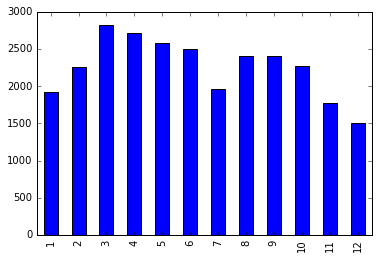

In [27]:
monthdist.plot(kind='bar')

In [28]:
monthdist.reset_index().values

array([[   1, 1923],
       [   2, 2253],
       [   3, 2823],
       [   4, 2715],
       [   5, 2583],
       [   6, 2496],
       [   7, 1959],
       [   8, 2406],
       [   9, 2408],
       [  10, 2269],
       [  11, 1774],
       [  12, 1512]])

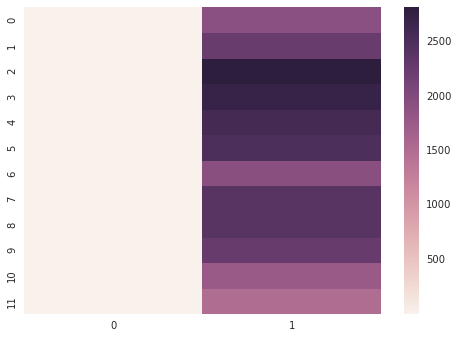

In [29]:
import seaborn as sns

sns.heatmap(monthdist.reset_index().values)

In [30]:
inspections.shape

(27121, 4)

In [31]:
# 5 Which zip code contains the most high risk violations?

all_data[all_data.risk_category == 'High Risk'].postal_code.value_counts().head(1)

94133    615
Name: postal_code, dtype: int64

In [76]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?


all_data[all_data.type == 'New Ownership'].risk_category.value_counts()

# should be categorized as low risk based on the data below

Low Risk         545
Moderate Risk    419
High Risk        145
Name: risk_category, dtype: int64

In [33]:
# 7 Examining the descriptions, what is the most common violation?

violations.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3391
Name: description, dtype: int64

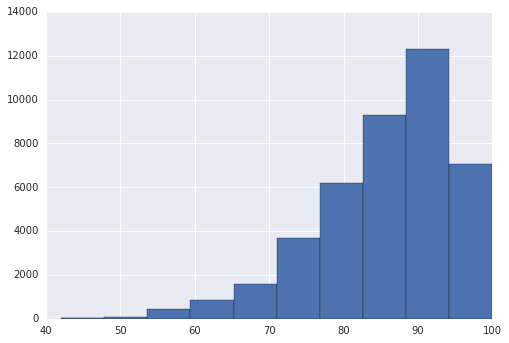

In [34]:
# 8 Create a hist of the scores with 10 bins

# ignoring the NaNs

scores = all_data.Score

scores = scores[scores.notnull()]

scores.hist(bins=10)

In [80]:
# 9 Can you predict risk category based on the other features in this dataset?

all_data.columns

Index([u'business_id', u'name', u'address', u'city', u'postal_code',
       u'latitude', u'longitude', u'phone_number', u'TaxCode',
       u'business_certificate', u'application_date', u'owner_name',
       u'owner_address', u'owner_city', u'owner_state', u'owner_zip', u'Score',
       u'date', u'type', u'ViolationTypeID', u'risk_category', u'description'],
      dtype='object')

In [84]:
pred = all_data[['postal_code', 'risk_category', 'ViolationTypeID']].dropna()

pred.head()

,postal_code,risk_category,ViolationTypeID
1,94104,Moderate Risk,103129.0
2,94104,Low Risk,103144.0
4,94104,Low Risk,103154.0
5,94104,Moderate Risk,103119.0
6,94104,Low Risk,103145.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b291050>]], dtype=object)

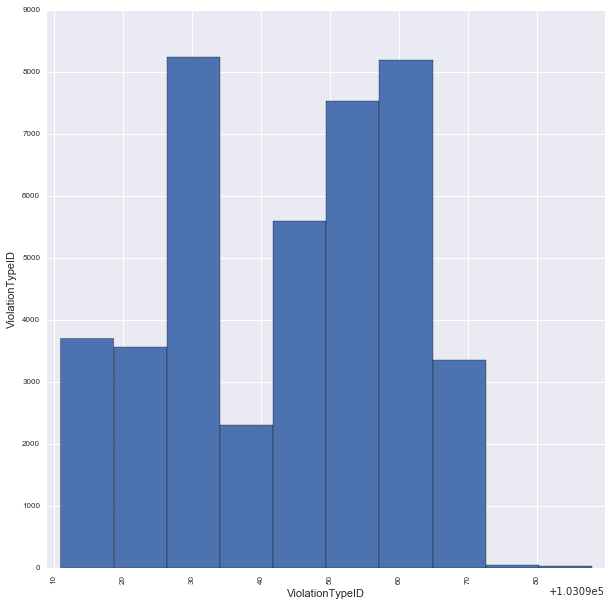

In [86]:
color_map = {
    'High Risk': 'r',
    'Moderate Risk': 'b',
    'Low Risk': 'g'
}
colors = [color_map[s] for s in pred['risk_category']]
pd.scatter_matrix(pred, color=colors, figsize=(10,10))


In [36]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/




In [37]:
############################
### A Little More Morbid ###
############################

In [38]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [39]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, 
                inplace=True)

killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [40]:
# 2. Show the count of missing values in each column

# Are there any nulls?
killings.isnull().values.any()

True

In [41]:
# nulls by column

killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [42]:
# total nulls across all columns

killings.isnull().sum().sum()

4

In [43]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.fillna(value='Unknown', inplace=True)

# test it 
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [44]:
# 4. How many killings were there so far in 2015?

killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [45]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [46]:
# 6. How many killings were of unarmed people?

# lets look at the available options first 

killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [47]:
unarmed = killings[killings.armed == 'No'].armed.count()

unarmed

102

In [48]:
# 7. What percentage of all killings were unarmed?

unarmed*100./(killings.armed.count())

21.841541755888652

In [49]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [50]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

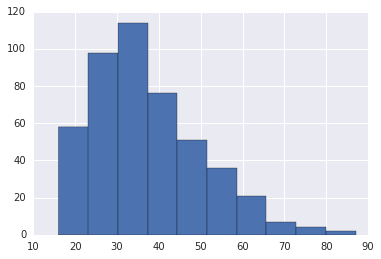

In [51]:
# 10. Display a histogram of ages of all killings

%matplotlib inline
import seaborn as sns

killings.age.hist()

Asian/Pacific Islander
Black
Hispanic/Latino
Native American
Unknown
White


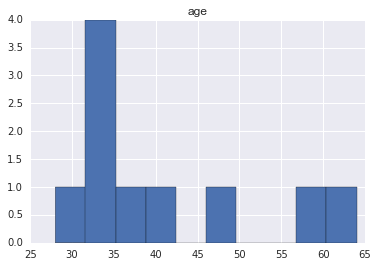

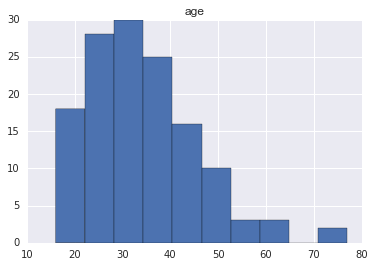

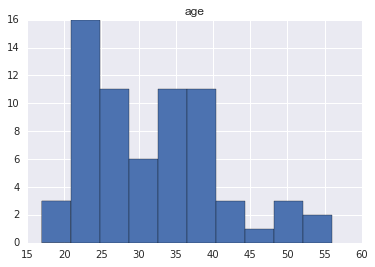

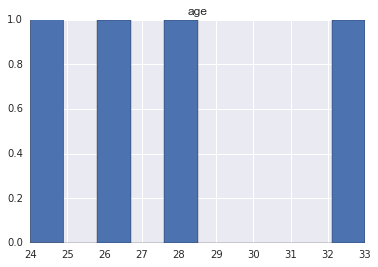

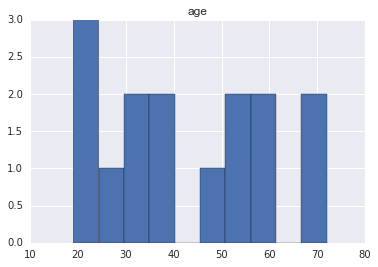

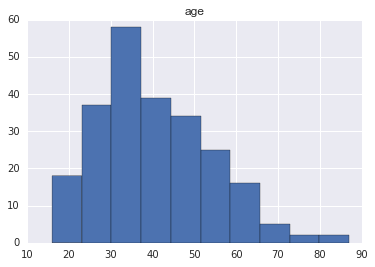

In [52]:
# 11. Show 6 histograms of ages by race

for gp, gpv in killings[['race', 'age']].groupby('race') :
    print gp
    gpv.hist()

In [53]:
# 12. What is the average age of death by race?

import numpy as np

killings.groupby(['race']).age.agg(np.mean)

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

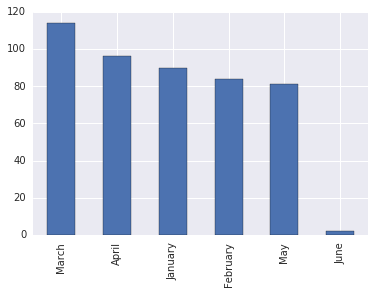

In [54]:
# 13. Show a bar chart with counts of deaths every month

killings.month.value_counts().plot(kind='bar')

In [55]:
###################
### Less Morbid ###
###################

In [56]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [57]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

print majors.columns

majors.drop(['Employed_full_time_year_round', 'Major_code'], axis=1, inplace=True)

print majors.columns

Index([u'Unnamed: 0', u'Major_code', u'Major', u'Major_category', u'Total',
       u'Employed', u'Employed_full_time_year_round', u'Unemployed',
       u'Unemployment_rate', u'Median', u'P25th', u'P75th'],
      dtype='object')
Index([u'Unnamed: 0', u'Major', u'Major_category', u'Total', u'Employed',
       u'Unemployed', u'Unemployment_rate', u'Median', u'P25th', u'P75th'],
      dtype='object')


In [58]:
# 2. Show the cout of missing values in each column

majors.isnull().any()

Unnamed: 0           False
Major                False
Major_category       False
Total                False
Employed             False
Unemployed           False
Unemployment_rate    False
Median               False
P25th                False
P75th                False
dtype: bool

In [59]:
# 3. What are the top 10 highest paying majors?

top10 = majors.sort_values('P75th', ascending=False).head(10)[['Major', 'P75th']].reset_index(drop=True)

top10

,Major,P75th
0,PETROLEUM ENGINEERING,210000.0
1,MATHEMATICS AND COMPUTER SCIENCE,136000.0
2,NUCLEAR ENGINEERING,128000.0
3,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,125000.0
4,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,125000.0
5,NAVAL ARCHITECTURE AND MARINE ENGINEERING,125000.0
6,MINING AND MINERAL ENGINEERING,124000.0
7,METALLURGICAL ENGINEERING,123000.0
8,CHEMICAL ENGINEERING,120000.0
9,ELECTRICAL ENGINEERING,116000.0


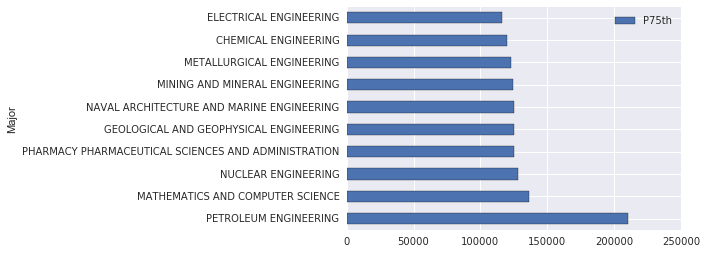

In [60]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!


top10.plot(x='Major', y='P75th', kind='barh')

In [61]:
# 5. What is the average median salary for each major category?

majors.groupby('Major_category').Median.agg(np.mean)

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [62]:
# 6. Show only the top 5 paying major categories

majors.groupby('Major_category').P75th.agg(np.max).sort_values(ascending=False).head(5)

Major_category
Engineering                210000.0
Computers & Mathematics    136000.0
Health                     125000.0
Business                   115000.0
Social Science             110000.0
Name: P75th, dtype: float64

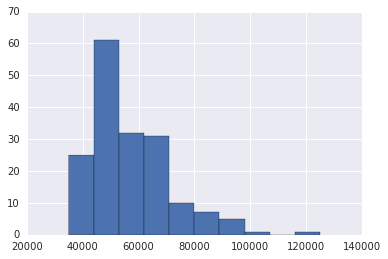

In [63]:
# 7. Plot a histogram of the distribution of median salaries

majors.Median.hist()

Major_category
Agriculture & Natural Resources        Axes(0.125,0.125;0.775x0.775)
Arts                                   Axes(0.125,0.125;0.775x0.775)
Biology & Life Science                 Axes(0.125,0.125;0.775x0.775)
Business                               Axes(0.125,0.125;0.775x0.775)
Communications & Journalism            Axes(0.125,0.125;0.775x0.775)
Computers & Mathematics                Axes(0.125,0.125;0.775x0.775)
Education                              Axes(0.125,0.125;0.775x0.775)
Engineering                            Axes(0.125,0.125;0.775x0.775)
Health                                 Axes(0.125,0.125;0.775x0.775)
Humanities & Liberal Arts              Axes(0.125,0.125;0.775x0.775)
Industrial Arts & Consumer Services    Axes(0.125,0.125;0.775x0.775)
Interdisciplinary                      Axes(0.125,0.125;0.775x0.775)
Law & Public Policy                    Axes(0.125,0.125;0.775x0.775)
Physical Sciences                      Axes(0.125,0.125;0.775x0.775)
Psychology & Social

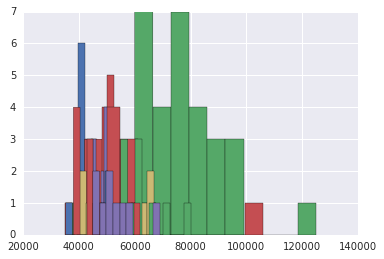

In [64]:
# 8. Plot a histogram of the distribution of median salaries by major category

majors.groupby('Major_category').Median.hist()

In [65]:
# 9. What are the top 10 most UNemployed majors?

majors.sort_values('Unemployed', ascending=False).Major.head(10)

161    BUSINESS MANAGEMENT AND ADMINISTRATION
158                          GENERAL BUSINESS
114                                PSYCHOLOGY
159                                ACCOUNTING
13                             COMMUNICATIONS
73            ENGLISH LANGUAGE AND LITERATURE
164          MARKETING AND MARKETING RESEARCH
132          POLITICAL SCIENCE AND GOVERNMENT
25                          GENERAL EDUCATION
78                                    BIOLOGY
Name: Major, dtype: object

In [66]:
# What are the unemployment rates?

print (majors.Unemployed/(majors.Unemployed + majors.Employed)).head(5)

majors.head(5)

0    0.026147
1    0.028636
2    0.030248
3    0.042679
4    0.049188
dtype: float64


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [67]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors.groupby('Major_category').Unemployed.agg(np.mean).sort_values(ascending=False)

Major_category
Business                               33415.153846
Communications & Journalism            25299.750000
Social Science                         14683.333333
Arts                                   13015.625000
Humanities & Liberal Arts              11942.400000
Psychology & Social Work               11578.444444
Law & Public Policy                     8609.800000
Education                               7833.500000
Computers & Mathematics                 7270.363636
Health                                  6251.083333
Industrial Arts & Consumer Services     5765.714286
Engineering                             5047.896552
Biology & Life Science                  4095.357143
Physical Sciences                       3822.100000
Interdisciplinary                       2990.000000
Agriculture & Natural Resources         1855.100000
Name: Unemployed, dtype: float64

In [68]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042



majors['sample_employment_rate'] = majors['Employed']/majors['Total']*1.

majors.head(1)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225


In [69]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

In [72]:
majors['sample_unemployment_rate'] = 1- majors['sample_employment_rate'] 

majors.head(5)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
